In [69]:
# Note: This notebook was created by Guntaas Kapoor (guntaaskapoor.bt23cseds@pec.edu.in)

# **Autoencoders for Unsupervised Machine Learning**

1. Autoencoders are a type of Neural Network that are used to learn efficient lower dimension representations of the data

2. Autoencoders can be used for dimensionality reduction or anomaly detection

3. They are used in higher dimensional data like image data, text embeddings etc
- Encoder - Compresses the input into a lower dimensional data
- Decoder - Reconstructs the input from the lower dimensional data
- During training - minimize reconstruction loss (Mean Squared Error)

# Different types of Autoencoders:

- **Vanilla Autoencoder:** Uses fully connected layers to compress and reconstruct data.
  
- **Convolutional Autoencoder (CAE)**: Uses convolutional layers, effective for image data.

- **Variational Autoencoder (VAE)**: Learns a probabilistic distribution of the latent space, useful for generative modeling.

- **Denoising Autoencoder (DAE)**: Trained to reconstruct data from noisy inputs, enhancing robustness.


# 1. **Dimensionality Reduction for Images**

Unlike traditional autoencoders, CAEs retain spatial information, making them better for high-dimensional images.
Can be used as a feature extractor for clustering or classification tasks.

## Convolutional Autoencoder (CAE) - Used for image data

## Importing the libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [29]:
from sklearn.datasets import load_digits

In [30]:
# Dataset: 8x8 1797 images of handwritten digits(0-9)

In [31]:
data = load_digits()
X = data.data

In [32]:
X.shape

(1797, 64)

In [33]:
X[0].size # Size of each image (8x8=64)

64

## Scaling each image to from 0-255 to 0-1 values

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_scaled = scaler1.fit_transform(X)

In [36]:
X_scaled[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

## Build the autoencoder

In [38]:
input_dimension = X_scaled.shape[1]

In [39]:
input_dimension

64

In [40]:
encoding_dimension = 16

In [41]:
input_layer = Input(shape = (input_dimension,))

In [42]:
encoded = Dense(encoding_dimension, activation = 'relu')(input_layer)

In [43]:
decoded = Dense(input_dimension, activation = 'sigmoid')(encoded)

In [44]:
autoencoder = Model(input_layer, decoded)

In [45]:
autoencoder.compile(optimizer = 'adam', loss = 'mse')

## Train the Autoencoder

In [68]:
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)
# batch size = Number of images loaded at once
# shuffle = shuffle the order images to be used as input
# Epochs = number of iterations
# validation_split = The amount of data used for validating the model while training (here 0.2 = 20% of the input data is used for validation)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0147 - val_loss: 0.0155
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0153
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0144 - val_loss: 0.0150
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - val_loss: 0.0148
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0147
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - val_loss: 0.0147
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - val_loss: 0.0144
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - val_loss: 0.0143
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - val_loss: 0.0141
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - val_loss: 0.0140
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - val_loss: 0.0138
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - val_l

## Extract the compressed features

In [48]:
encoder = Model(input_layer, encoded)
X_compressed = encoder.predict(X_scaled)
X_reconstructed = autoencoder.predict(X_scaled)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


## Visualize the original and reconstructed images

In [56]:
n = 10
indices = np.random.randint(0, len(X_scaled), n)
originals = X_scaled[indices]
reconstructions = X_reconstructed[indices]

Text(0.5, 1.0, 'Reconstructed Images')

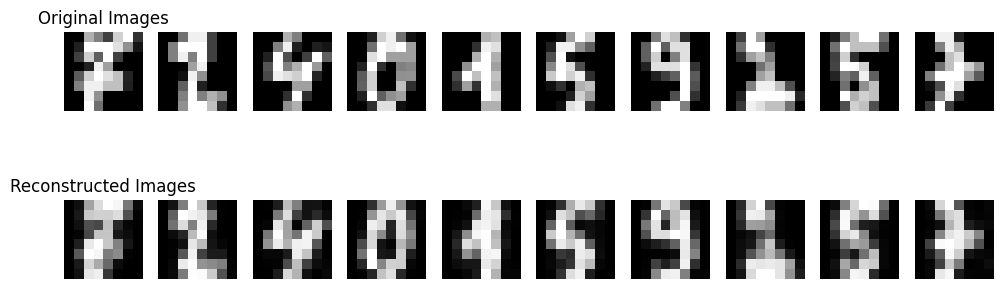

In [57]:
fig, axes = plt.subplots(2, n, figsize=(12, 4))
for i in range(n):
    # Original Image
    axes[0, i].imshow(originals[i].reshape(8, 8), cmap='gray')
    axes[0, i].axis('off')

    # Reconstructed Image
    axes[1, i].imshow(reconstructions[i].reshape(8, 8), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Original Images")
axes[1, 0].set_title("Reconstructed Images")

# 2. **Anomaly Detection using CAEs**

Anomaly Detection in Images
CAEs can detect anomalies by learning normal patterns and flagging unusual reconstructions.
Used in fraud detection (e.g., fake currency), defect detection (manufacturing), and medical anomaly detection.
Autoencoders can be used for anomaly detection by comparing reconstruction errors between normal and anomalous data. Since an autoencoder learns to reconstruct normal data well, anomalous data will have higher reconstruction errors.

## Steps to Compare Reconstruction Errors:

- Train an Autoencoder on Normal Data
- Compute Reconstruction Errors for normal and anomalous samples.
- Visualize Error Distribution to detect anomalies.

## Create normal and anomalous data

In [51]:
num_anomalies = 200
X_anomalies = X_scaled[:num_anomalies] + np.random.normal(0, 0.5, X_scaled[:num_anomalies].shape)
X_anomalies = np.clip(X_anomalies, 0, 1)  # Keep values in [0,1]

# Normal data (rest of the dataset)
X_normal = X_scaled[num_anomalies:]

## Train the autoencoder

In [52]:
input_dim = X_scaled.shape[1]
encoding_dim = 16  # Compressed size

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train only on normal data
autoencoder.fit(X_normal, X_normal, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1697 - val_loss: 0.1380
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1164 - val_loss: 0.0821
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0757 - val_loss: 0.0705
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - val_loss: 0.0659
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0630 - val_loss: 0.0614
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0587 - val_loss: 0.0574
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0543 - val_loss: 0.0532
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0502 - val_loss: 0.0492
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0475 - val_loss: 0.0461
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - val_loss: 0.0431
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0409 - val_loss: 0.0408
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 - val_l

## Calculate reconstruction errors

In [53]:
# Get reconstructed data
X_normal_reconstructed = autoencoder.predict(X_normal)
X_anomalies_reconstructed = autoencoder.predict(X_anomalies)

# Compute reconstruction errors (MSE)
normal_errors = np.mean(np.square(X_normal - X_normal_reconstructed), axis=1)
anomaly_errors = np.mean(np.square(X_anomalies - X_anomalies_reconstructed), axis=1)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


## Visualize reconstruction errors

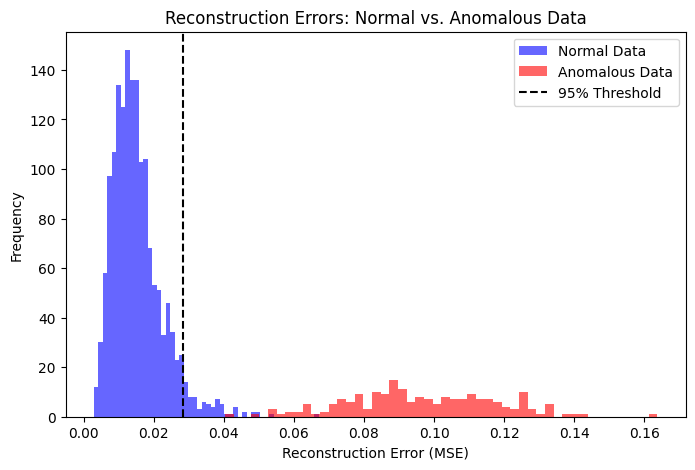

In [30]:
plt.figure(figsize=(8, 5))
plt.hist(normal_errors, bins=50, alpha=0.6, label="Normal Data", color='blue')
plt.hist(anomaly_errors, bins=50, alpha=0.6, label="Anomalous Data", color='red')
plt.axvline(np.percentile(normal_errors, 95), color='black', linestyle='dashed', label="95% Threshold")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Errors: Normal vs. Anomalous Data")
plt.show()


## Interpreting the Results

- The blue histogram represents normal data reconstruction errors.

- The red histogram represents anomalous data reconstruction errors.
    
- The black dashed line is the 95th percentile of normal errors, which can be used as a threshold.

- Anomalous data has higher reconstruction errors, making it separable from normal data.

In [71]:
# Thank You
